## Productivity Prediction of Garment Employees Data Set

In [1]:
# import packges that we need
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# the URL for our data
PATH_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv"

# read the data set as csv file
df = pd.read_csv(PATH_URL)

In [3]:
# show the dataset
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889



### Data Set Information:

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.


### Attribute Information:

- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter : A portion of the month. A month was divided into five quarters
- department : Associated department with the instance
- team : Associated team number with the instance
- no_of_workers : Number of workers in each team
- no_of_style_change : Number of changes in the style of a particular product
- targeted_productivity : Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip : Work in progress. Includes the number of unfinished items for products
- over_time : Represents the amount of overtime by each team in minutes
- incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idle_time : The amount of time when the production was interrupted due to several reasons
- idle_men : The number of workers who were idle due to production interruption
- actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [4]:
# Column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
# fixing a duplicates proplem for 'finishing'
df['department'] = df['department'].replace('finishing ', 'finishing')
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [6]:
# Information about categorical data
df.describe(include='object')

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,2,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [7]:
# count the missing values in each column
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
# information about numerical data
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [9]:
# convert date column from object to datetime
df['date'] = df['date'].apply(pd.to_datetime)

# extract month from date column
df['month'] = pd.DatetimeIndex(df['date']).month

### Is there a difference between the standard minute value for a task in each department of the garment manufacturing factory?

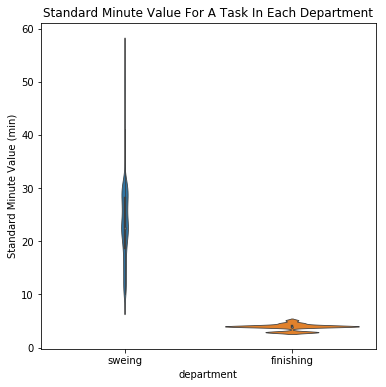

In [10]:
# the size of our plot
plt.figure(figsize=(6,6))

# plot a violinplot for 'department' and 'smv' columns
sns.violinplot(
    data=df, # dataset
    x="department", # x axis
    y="smv",  # y axis
    linewidth=0.8
)
plt.ylabel("Standard Minute Value (min)") # y axis label
# set plot title
plt.title("Standard Minute Value For A Task In Each Department");

We can see from the Violin Plot that the sweing department have a bigger range of standard minute value for a task than the finishing department, the standard minute value for a task in sweing department is between 7 and 58 minutes.
And finishing department the standard minute value for there task is between 3 and 6 minutes.

This means that the sewing department requires more time and effort, and the finishing department requires less time and effort. The number of workers in the sewing department is should be greater than the finishing department. Let us check!

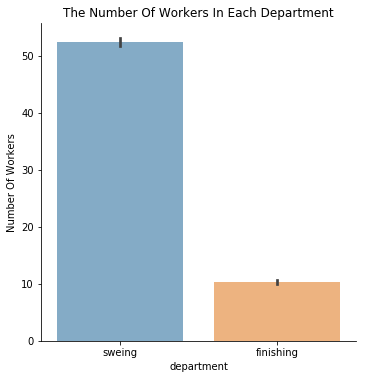

In [11]:
# Plot a barplot for 'department' and 'no_of_workers' columns
g = sns.catplot(
    data=df, # Data
    kind="bar", # Chart to use
    x="department", # X axis
    y="no_of_workers", # y axis
    alpha=.6, # transparancy
    height=5
)
plt.ylabel("Number Of Workers") # y axis label 
plt.title("The Number Of Workers In Each Department"); # the plot title

As we expected, the number of employees in the sewing department is much higher than the number of employees in the finishing department.
The number of employees in the sewing department is 55 employees, And 10 in the finishing department.

### Did the garment manufacturing factory achieve its goal in the production line for each quarter of the month? or not ?
#### The Targeted Productivity

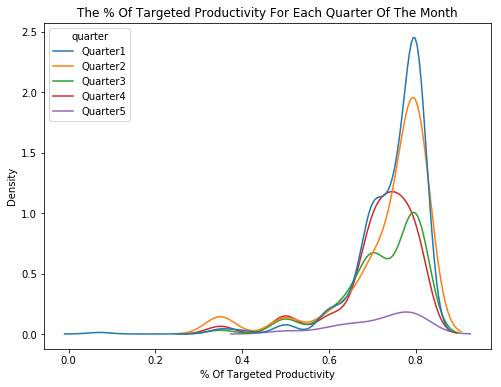

In [12]:
# the size of our plot
plt.figure(figsize=(8,6))

# Plot a kdeplot for 'targeted_productivity' and 'quarter' columns
sns.kdeplot(
    data=df, # the dataset
    x="targeted_productivity", # x axis
    hue="quarter"  # create line for each hue
)
plt.xlabel("% Of Targeted Productivity") # x axis label
plt.title("The % Of Targeted Productivity For Each Quarter Of The Month"); # the plot title

The plot shows that the garment manufacturing factory has a goal in the production line for each quarter of the month which is to set the majority % of there productivity to be 0.6 to 0.9.

In the next plot we will check if they reached there goal or not.

#### The Actual Productivity

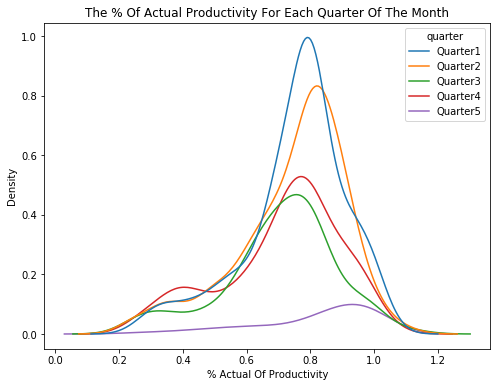

In [13]:
# the size of our plot
plt.figure(figsize=(8,6))

# Plot a kdeplot for 'actual_productivity' and 'quarter' columns
sns.kdeplot(
    data=df, # the dataset
    x="actual_productivity", # x axis
    hue="quarter"  # create line for each hue
)
plt.xlabel("% Actual Of Productivity") # x axis label
plt.title("The % Of Actual Productivity For Each Quarter Of The Month"); # the plot title

The KDE plot shows that the actual % of productivity for each quarter of the month, We can see that in each quarter the majority % of productivity is between 0.6 and 1.

And the plot shows quarter 1 and 2 have the same distribution, and quarter 3 and 4 also have the same distribution.
In the first quarter we find that the most frequent value of actual % of productivity is 0.8, And for the second and the six quarter, we find that the most frequent value of actual % of productivity is around 0.9, And the most frequent value of actual % of productivityaround 0.7 in third and the fourth quarter.

Thats mean the actual % of productivity that was delivered by the workers for each quarter of the month is from 60% to 100% That's a good for garment manufacturing factory. And the factory has already achieved their goal which is great!

###  Is the amount of overtime in each quarter of the month differ in each department for thea grment manufacturing factory?

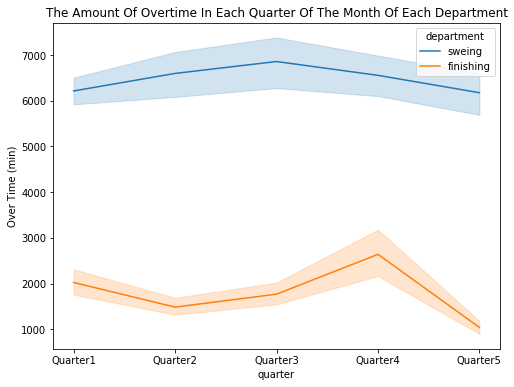

In [14]:
# the size of our plot
plt.figure(figsize=(8,6))

# Plot a lineplot for 'quarter', 'over_time' and 'department' columns
sns.lineplot(data=df, # the dataset
             x="quarter", # x axis
             y="over_time", # y axis
             hue="department") # create line for each hue

plt.ylabel("Over Time (min)") # y axis label
plt.title("The Amount Of Overtime In Each Quarter Of The Month Of Each Department"); # the plot title

The plot shows that the overtime in the sweing department is much higher than the finighing department. And the overtime for the sweing department is between 6,000 min and 7,000 min. And in the finighing department is between 1,000 min and 2,500 min.

We can see that the over time of the sweing department is increasing from quarter 1 to 3 and decreasing from quarter 3 to 5. And for the finighing department the over time is increasing from quarter 2 to 4 and decreasing from quarter 1 to 2 and 4 to 5.

### Is the number of product changes effect the standard minute value for each quarter of the month in garment manufacturing factory?

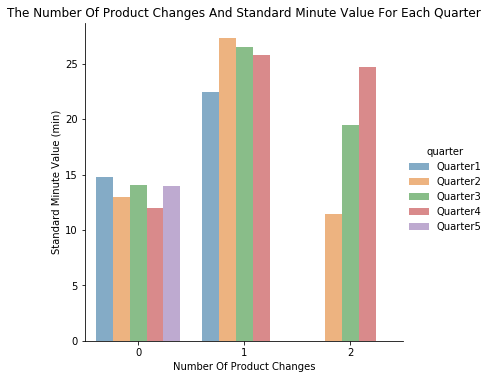

In [15]:
# Plot a barplot for 'no_of_style_change', 'smv' and 'quarter' columns
sns.catplot(
    data=df, # the dataset
    kind="bar", # kind of plot
    x="no_of_style_change", # X axis
    y="smv", # y axis
    hue="quarter", # create bar for each hue
    alpha=.6, # transparancy
    height=5,
    ci = None)

plt.xlabel("Number Of Product Changes") # x axis label
plt.ylabel("Standard Minute Value (min)") # y axis label
plt.title("The Number Of Product Changes And Standard Minute Value For Each Quarter"); # the plot title

We can see many insights from this plot, First if we don't make any changes in the product the standard minute value for a task will be lower than standard minute value if we make 1 or 2 changes. which is mean we make changes on a product will take a longer time for completing the task.

Also we can there's no clear difference between standard minute value for each quarter if the number of changes were 0, but we can say that the standard minute value in quarter 1,3 and 5 take much time than quarter 2 and 4.

And if the number of changes were 1 we can see that the standard minute value in quarter 2,3 and 4 take much time than quarter 1. And if the number of changes were 2 we can see that the standard minute value in quarter 4 take much time than quarter 3 and take less time for quarter 2. 

The plot shows a missing value for quarters in number of changes 1 and 2, which is mean if the number of changes were 1 there's no changing in the product in quarter 5 of the month.

And if the number of changes were 2 there's no changing in the product in quarter 1 and 5 of the month.

### What is the most day of the week the production was interrupted due to several reasons for each department in garment manufacturing factory?

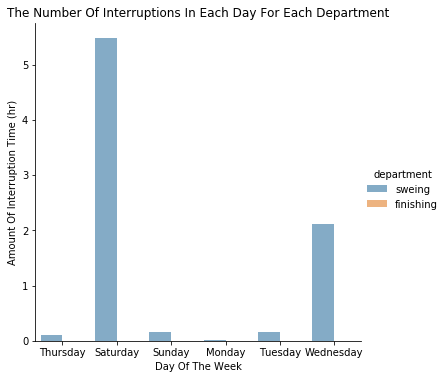

In [16]:
# Plot catplot for 'day', 'idle_time' and 'department' columns
sns.catplot(
    data=df, # Data
    kind="bar", # Chart to use
    x="day", # X axis
    y="idle_time", # y axis
    hue="department", # create bar for each hue
    alpha=.6, # transparancy
    height=5,
    ci = None
)
plt.xlabel("Day Of The Week") # x axis label
plt.ylabel("Amount Of Interruption Time (hr)") # y axis label
plt.title("The Number Of Interruptions In Each Day For Each Department"); # the plot title

We can see that Saturday is the most interrupted day in the production of the sweing department, then Wednesday. And the Amount of interruption time for Saturday is above 5 hours, and for Wednesday 2 to 3 hours.

And for Thursday, Sunday, Monday and Tuesday the Amount of interruption time is less than half hour, Which is somthing good for the production line!

The plot shows that in the finishing department there are no interruptions, This is definitely what makes the production line in this department fast.

### PairGrid- Scatter Plots For Different Variables

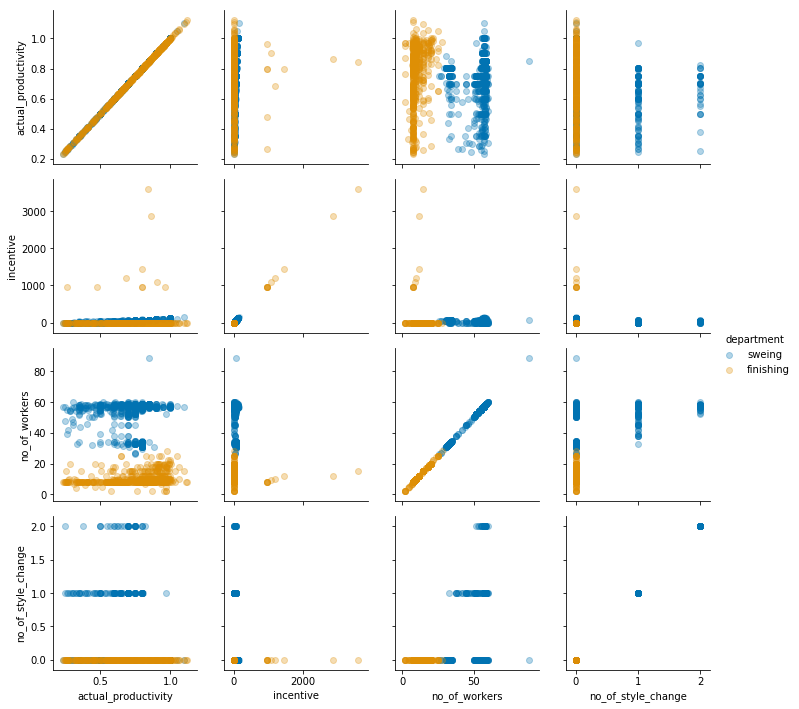

In [17]:
# Plot PairGrid for 'ctual_productivity', 'incentive',  'no_of_workers',
#'no_of_style_change' and 'department' columns
g = sns.PairGrid(df, # the dataset
                 vars=['actual_productivity', 'incentive', 'no_of_workers', 'no_of_style_change'], # x, y axis
                 hue='department', # create bar for each hue
                 palette='colorblind') # plot style

# draw a scatter plot
g.map(plt.scatter, alpha=0.3)
g.add_legend(); # add the legend

We can see from the pair grid several results:

1. actual_productivity VS no_of_style_change: There's no changes were made on the proudect in the finishig department, And for the sweing department the number of the most frequent changes is 1. and the highest number of changes is 2.

2. incentive VS no_of_style_change: The plot clarifies that there are no financial incentives for workers in the sewing department, whether there are product modifications or not, Despite the number of overtime hours required to finish work! And for finishig department and no changes were made on the product we can see there's financial incentive for the workers from 1,000 to 4,000.

3. no_of_workers VS no_of_style_change: We see that the largest number of workers is from 40 to 60 workers in the sewing department where they change the product once , the second largest number of workers is from 50 to 60 workers where the changes on the product was 0 changes. And for finishig department number of workers is from 0 to 35 workers where the changes on the product was 0 changes.

4. actual_productivity VS no_of_workers: We see that the number of workers in the finishing department ranges from 0 to 35, and that the most frequent value of productivity in this department from 0.8 to 1. Also the number of workers in the sewing department ranges from 25 to 85, And we see gathering in points in the entire period of actual_productivity, We can't extract a clear insight in this part!

5. incentive VS no_of_workers: There are no financial incentives for most workers in both departments, and there's a few number of workers from the finishing department are given financial incentives.

6. actual_productivity VS incentive: It is clear from the plot that the majority of workers did not receive any financial incentives, and we see that there are a small number of workers from the finishing department who received financial incentives. The higher the % of productivity, the higher the financial incentives.